## Objective
In this notebook I am attempting to create an algorithm which will find the roots of some polynomial $f:\mathcal{R}\rightarrow\mathcal{R}$ given a guess of some reasonable interval on which the zero might lie.

The general approach will be as follows:

1. Guess an interval $[a,b]$ on which the zero might lie
2. Guess $k = \frac{a+b}{2}$ as the zero
3. If { $f'(k) < 0$ and $f(k) < 0$ } or { $f'(k) > 0$ and $f(k) > 0$ }:
    4. Let $b = k$ and $k = \frac{k}{2}$ (this is halfway between left endpoint and halfway)
5. Else if $f'(k) = 0$:
    6. If $f(k) < 0$:
        7. $a = k$
    8. Else:
        9. $b = k$
9. Else let $a=k$ and $k = \frac{k+b}{2}$ (this is halfway between halfway and right endpoint)
10. Loop from step (2)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Polynomial #1

In [205]:
# Define the coefficients of the polynomial equation
coefficients = [1,0,0,30] # x^3 + 30

# Create a polynomial object
polynomial = np.poly1d(coefficients)

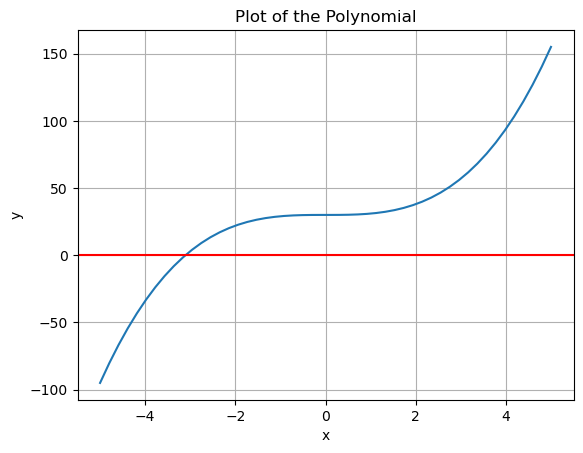

In [229]:
# Generate x values for plotting
x = np.linspace(-5, 5, 50)

# Evaluate the polynomial for the corresponding x values
y = polynomial(x)

# Plot the polynomial
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Polynomial')
plt.grid(True)

# Add a horizontal line at y = 0
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

In [245]:
a = -5
b = 5
loops = 20
true_zero = -3.10723250595386

shots = []
for i in range(loops):
    k = (a + b) / 2
    if (polynomial(k) < 0 and polynomial.deriv()(k) < 0) or (polynomial(k) > 0 and polynomial.deriv()(k) > 0):
        b = k
        shots.append(k - true_zero)
    elif polynomial.deriv()(k) == 0:
        if polynomial(k) > 0:
            b = k
        else:
            a = k
    else:
        a = k
        shots.append(k - true_zero)

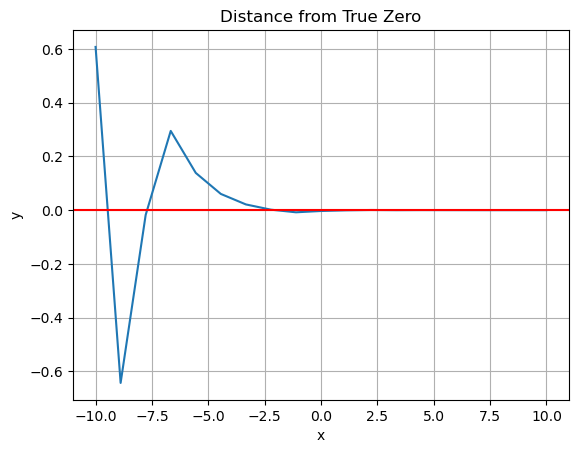

In [246]:
# Generate x and y values for plotting
x = np.linspace(-10, 10, loops-1)

y = np.array(shots)

# Plot the polynomial
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distance from True Zero')
plt.grid(True)

# Add a horizontal line at y = 0
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

### Polynomial #2

### [Numerical Derivative]

In [255]:
def derivative(f,x):
    return ( (f(x + 0.000000001) - f(x))/0.000000001 )

In [260]:
# Create a polynomial object
x = np.linspace(-10,10,250)
x = x[x != 0]
y = np.vectorize(lambda x: np.sin(x) / x - 0.25)

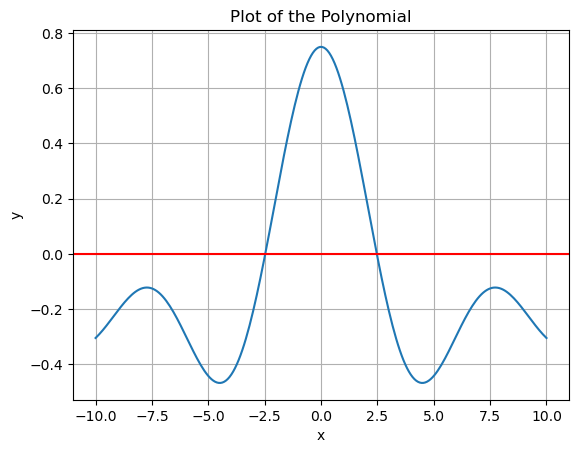

In [261]:
# Plot the polynomial
plt.plot(x, y(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Polynomial')
plt.grid(True)

# Add a horizontal line at y = 0
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

In [258]:
a = 0
b = 4
loops = 20
true_zero = 2.4745767873698290126

shots = []
for i in range(loops):
    k = (a + b) / 2
    if (y(k) < 0 and derivative(y,k) < 0) or (y(k) > 0 and derivative(y,k) > 0):
        b = k
        shots.append(k - true_zero)
    elif derivative(y,k) == 0:
        if y(k) > 0:
            b = k
        else:
            a = k
    else:
        a = k
        shots.append(k - true_zero)

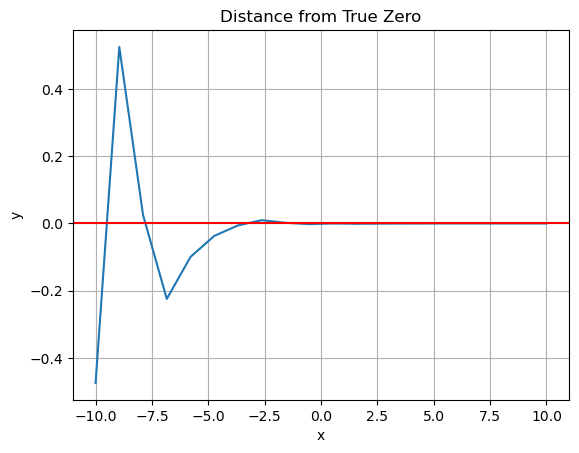

In [259]:
# Generate x and y values for plotting
x = np.linspace(-10, 10, loops)

y = np.array(shots)

# Plot the polynomial
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distance from True Zero')
plt.grid(True)

# Add a horizontal line at y = 0
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

## Questions
1. Will this approach generalize to other functions?
2. Is there a way to automate the initial guess for $[a,b]$?
3. Why does the distance from zero plot (1) look the way it does and (2) seem to be the same for different polynomials? Is it in fact the same for different polynomials?
4. What causes the initial guess of $[a,b]$ to break the algorithm? 
5. Can this approach generalize for $f:\mathcal{R}^n\rightarrow\mathcal{R}^n$?